In [1]:
import os 
import pandas as pd
import pathlib
from matplotlib.pyplot import figure

In [2]:
ocular_dataset = pd.read_csv("full_df.csv")
ocular_dataset.head(2)



,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg


C:\Users\Omar\AppData\Local\Temp\ipykernel_26908\3585302836.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3= ocular_dataset['labels'].str.replace('[','').str.replace(']','')


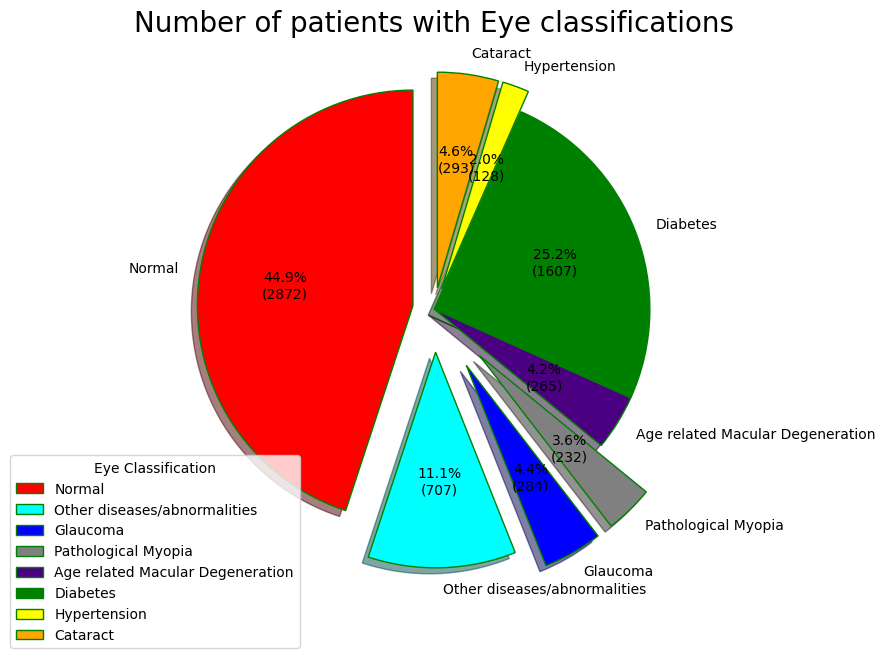

In [3]:
import matplotlib.pyplot as plt

df2 = ocular_dataset['labels']
df3= ocular_dataset['labels'].str.replace('[','').str.replace(']','')
df4 = df3.str.strip(" ' ")



dfN = df4[df4.str.contains('N')]
dfD = df4[df4.str.contains('D')]
dfC = df4[df4.str.contains('C')]
dfO = df4[df4.str.contains('O')]
dfH = df4[df4.str.contains('H')]
dfM = df4[df4.str.contains('M')]
dfG = df4[df4.str.contains('G')]
dfA = df4[df4.str.contains('A')]


Classifications=['Normal', 'Other diseases/abnormalities', 'Glaucoma', 'Pathological Myopia', 'Age related Macular Degeneration', 'Diabetes', 'Hypertension', 'Cataract']
data = [len(dfN),len(dfO),len(dfG),len(dfM),len(dfA),len(dfD),len(dfH),len(dfC)]
import numpy as np
fig, ax = plt.subplots(figsize =(10, 7))  # define an ax
explode = (0.1, 0.2, 0.3, 0.3, 0.0, 0.0, 0.1, 0.1)
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 


def func(pct, allvalues):                # this bit will give you the wedge labels
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ( "red", "cyan", "blue","grey", "indigo", "green","yellow","orange")
wedges, texts, autotexts = ax.pie(data, explode = explode, labels = Classifications, colors = colors, wedgeprops=wp,shadow=True, startangle=90, textprops = dict(color='black'),autopct = lambda pct: func(pct, data))

# explode tells you how much the wedge has come out
# wp defines the borders of your wedge, line thickness and colour
# shadow leaves a shadow
#startangle rotates the pie
# textprops will change text color
#ax.figure(figsize=(10,10))
plt.title('Number of patients with Eye classifications',fontsize=20)
# adding legend box to anything

ax.legend(wedges, Classifications, title ="Eye Classification", loc ="center left", bbox_to_anchor = (-0.3, 0.0, 0.4, 0.1))


In [4]:
cleaned = ocular_dataset.drop(["ID","labels","Left-Fundus","Right-Fundus","Left-Diagnostic Keywords","Right-Diagnostic Keywords","N","D","G","C","A","H","M","O","labels","filepath"],axis=1)
ocular_dataset = cleaned
ocular_dataset.head(2)

,Patient Age,Patient Sex,target,filename
0,69,Female,"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,57,Male,"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg


In [5]:
ocular_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient Age  6392 non-null   int64 
 1   Patient Sex  6392 non-null   object
 2   target       6392 non-null   object
 3   filename     6392 non-null   object
dtypes: int64(1), object(3)
memory usage: 199.9+ KB


In [6]:
unique_values = set(tuple(x) for x in ocular_dataset['target'])
unique_values

{('[',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '1',
  ']'),
 ('[',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '1',
  ',',
  ' ',
  '0',
  ']'),
 ('[',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '1',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ']'),
 ('[',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '1',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ']'),
 ('[',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '1',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ']'),
 ('[',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '1',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
  '0',
  ',',
  ' ',
 

In [7]:
def cleaning_target(df):
  target_str = df["target"].astype(str)
  cleaned_target = target_str.str.replace("[","").str.replace("]","").str.replace("'","")
  print(cleaned_target)
  cleaned_target = cleaned_target.str.split(",")
  targets = [[int(label.strip("'")) for label in labels] for labels in cleaned_target]
  print(targets)
  df["target"] = targets

In [11]:
dictionary_diseases = {
    0:"Normal",
    1:"Diabetes",
    2:"Glaucoma",
    3:"Cataract",
    4:"Age related",
    5:"Hypertension",
    6:"Pathological Myopia",
    7:"other"
}
dictionary_diseases

{0: 'Normal',
 1: 'Diabetes',
 2: 'Glaucoma',
 3: 'Cataract',
 4: 'Age related',
 5: 'Hypertension',
 6: 'Pathological Myopia',
 7: 'other'}

In [12]:
unique_values = set(tuple(x) for x in ocular_dataset['target'])
unique_values

{(0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 0, 0, 0)}

In [13]:
path_to_images = "preprocessed_images"

In [15]:
image_paths=[pathlib.Path(os.path.join(path_to_images,ocular_dataset["filename"][idx])) for idx, _ in ocular_dataset.iterrows()]
ocular_dataset["image_paths"] = image_paths
ocular_dataset = ocular_dataset.drop("filename",axis=1)
ocular_dataset.head(2)

,Patient Age,Patient Sex,target,image_paths
0,69,Female,"[1, 0, 0, 0, 0, 0, 0, 0]",preprocessed_images\0_right.jpg
1,57,Male,"[1, 0, 0, 0, 0, 0, 0, 0]",preprocessed_images\1_right.jpg


In [16]:
for idx,column  in ocular_dataset.iterrows():
    index_val= ocular_dataset.at[idx,"target"].index(1)
    ocular_dataset.at[idx,"disease"]  = dictionary_diseases[index_val]


In [17]:
dictionary_diseases

{0: 'Normal',
 1: 'Diabetes',
 2: 'Glaucoma',
 3: 'Cataract',
 4: 'Age related',
 5: 'Hypertension',
 6: 'Pathological Myopia',
 7: 'other'}

In [18]:
ocular_dataset.tail(2)

,Patient Age,Patient Sex,target,image_paths,disease
6390,57,Male,"[0, 1, 0, 0, 0, 0, 0, 0]",preprocessed_images\4690_left.jpg,Diabetes
6391,58,Male,"[0, 0, 0, 0, 0, 1, 0, 0]",preprocessed_images\4784_left.jpg,Hypertension


In [19]:
for row,column in ocular_dataset.iterrows():
    if column["disease"] not in ["Normal","Diabetes","Glaucoma","Cataract","Age related"]:
        ocular_dataset = ocular_dataset.drop(index=row)
        

In [20]:
ocular_dataset

,Patient Age,Patient Sex,target,image_paths,disease
0,69,Female,"[1, 0, 0, 0, 0, 0, 0, 0]",preprocessed_images\0_right.jpg,Normal
1,57,Male,"[1, 0, 0, 0, 0, 0, 0, 0]",preprocessed_images\1_right.jpg,Normal
2,42,Male,"[0, 1, 0, 0, 0, 0, 0, 0]",preprocessed_images\2_right.jpg,Diabetes
3,53,Male,"[0, 1, 0, 0, 0, 0, 0, 0]",preprocessed_images\4_right.jpg,Diabetes
4,50,Female,"[0, 1, 0, 0, 0, 0, 0, 0]",preprocessed_images\5_right.jpg,Diabetes
...,...,...,...,...,...
6386,58,Male,"[1, 0, 0, 0, 0, 0, 0, 0]",preprocessed_images\4683_left.jpg,Normal
6387,63,Male,"[0, 1, 0, 0, 0, 0, 0, 0]",preprocessed_images\4686_left.jpg,Diabetes
6388,42,Male,"[0, 1, 0, 0, 0, 0, 0, 0]",preprocessed_images\4688_left.jpg,Diabetes
6389,54,Male,"[0, 1, 0, 0, 0, 0, 0, 0]",preprocessed_images\4689_left.jpg,Diabetes


In [21]:
unique_values = set(tuple(x) for x in ocular_dataset['target'])
unique_values

{(0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 1, 0, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 0, 0, 0)}

In [22]:
for row , column in ocular_dataset.iterrows():
    target = column["target"]
    if target.index(1) in [5,6,7]:
        print("problem")
    
    ocular_dataset.at[row,"target"] = column["target"][:5]

In [23]:
ocular_dataset.head(2)

,Patient Age,Patient Sex,target,image_paths,disease
0,69,Female,"[1, 0, 0, 0, 0]",preprocessed_images\0_right.jpg,Normal
1,57,Male,"[1, 0, 0, 0, 0]",preprocessed_images\1_right.jpg,Normal


In [24]:
unique_values = set(tuple(x) for x in ocular_dataset['target'])
unique_values

{(0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 1, 0, 0),
 (0, 1, 0, 0, 0),
 (1, 0, 0, 0, 0)}

In [25]:
ocular_dataset=ocular_dataset.reset_index()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


## add target

def plot_left_eye_images(df: pd.DataFrame, nrows:int, ncols:int):
    random_idx = np.random.random_integers(0, len(df), nrows * ncols)
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 10))
    fig.suptitle('Randomly Selected Eye Images', fontsize=12)  # Add a title to the entire plot
    i = 0
    for row in range(nrows):
        for col in range(ncols):
            print(df["image_paths"][random_idx[i]])
            image_left = cv2.imread(str(df["image_paths"][random_idx[i]]))
            image_rgb_left = cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB)
            target = df["target"][random_idx[i]]
            class_val = np.argmax(target)  # Note: You'll need to define 'target' based on your specific use case.
            ax[row][col].imshow(image_rgb_left)
            ax[row][col].axis('off')  # Use 'off' instead of False to hide axis
            ax[row][col].set_title(f"label {dictionary_diseases[class_val]}")
            figure(figsize=(3,2),dpi = 80)

            i+=1

C:\Users\Omar\AppData\Local\Temp\ipykernel_26908\3610200034.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 5324 + 1) instead
  random_idx = np.random.random_integers(0, len(df), nrows * ncols)


preprocessed_images\2901_left.jpg
preprocessed_images\3150_right.jpg
preprocessed_images\616_left.jpg
preprocessed_images\3152_right.jpg
preprocessed_images\618_right.jpg
preprocessed_images\1065_left.jpg
preprocessed_images\2514_right.jpg
preprocessed_images\1436_right.jpg
preprocessed_images\4221_right.jpg
preprocessed_images\2532_right.jpg


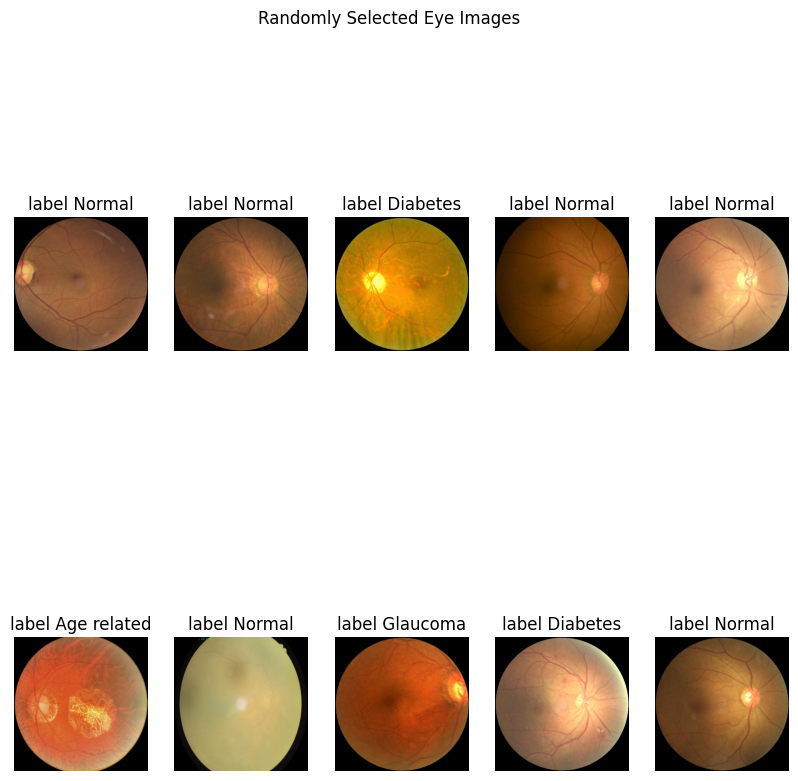

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

<Figure size 240x160 with 0 Axes>

In [27]:
plot_left_eye_images(ocular_dataset,ncols=5,nrows=2)

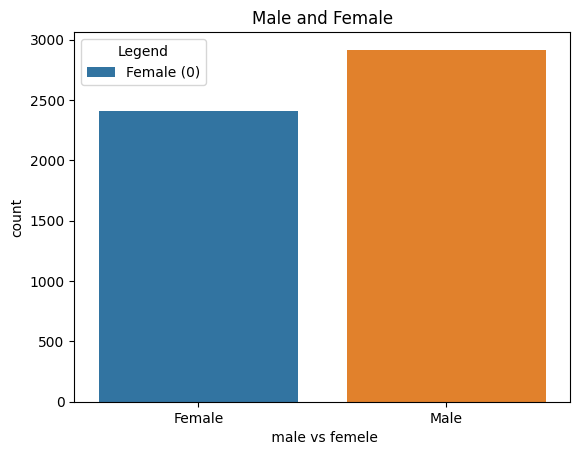

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=ocular_dataset, x="Patient Sex")
plt.title("Male and Female")
plt.legend(title="Legend", labels=["Female (0)", "Male (1)"])
plt.xlabel(" male vs femele")
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Diabetes'),
  Text(2, 0, 'Cataract'),
  Text(3, 0, 'Age related'),
  Text(4, 0, 'Glaucoma')])

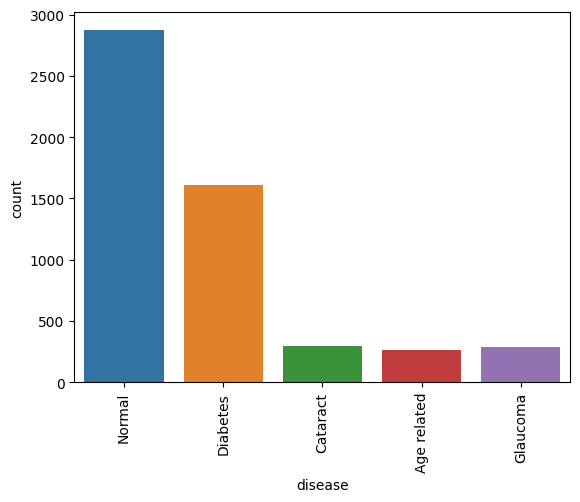

In [29]:
sns.countplot(data=ocular_dataset, x="disease")
plt.xticks(rotation=90)

In [30]:
ocular_dataset.groupby("disease")["disease"].count().sort_values(ascending=False)

disease
Normal         2873
Diabetes       1608
Cataract        293
Glaucoma        284
Age related     266
Name: disease, dtype: int64

In [31]:
disease_types = ["Normal","Diabetes","Cataract","Glaucoma","Age related"]

In [32]:
dictionary_diseases

{0: 'Normal',
 1: 'Diabetes',
 2: 'Glaucoma',
 3: 'Cataract',
 4: 'Age related',
 5: 'Hypertension',
 6: 'Pathological Myopia',
 7: 'other'}

In [33]:
#calculate minimum number of samples
#for undersampling the smallest number of samples must be used
minimum_samples = min(list(ocular_dataset["disease"].value_counts()))
minimum_samples

266

In [34]:
temp_dataframe = pd.DataFrame() #creates a blank data frame
for disease_type in disease_types:
  sampled_data = ocular_dataset.loc[ocular_dataset["disease"] == disease_type].sample(minimum_samples)
  temp_dataframe = pd.concat([temp_dataframe, sampled_data])

ocular_dataset = temp_dataframe


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Diabetes'),
  Text(2, 0, 'Cataract'),
  Text(3, 0, 'Glaucoma'),
  Text(4, 0, 'Age related')])

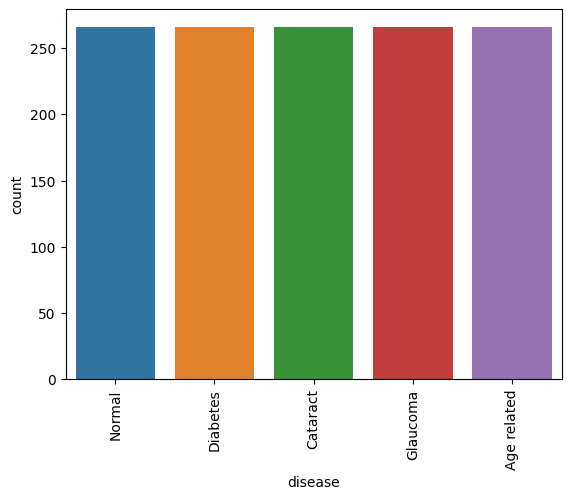

In [35]:
sns.countplot(data=ocular_dataset, x="disease")
plt.xticks(rotation=90)

In [36]:
ocular_dataset.groupby("disease")["disease"].count().sort_values(ascending=False)

disease
Age related    266
Cataract       266
Diabetes       266
Glaucoma       266
Normal         266
Name: disease, dtype: int64

In [37]:
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstd, ToTensord, Resized, Cropd, RandAffined, RandFlipd,RandCropd,CropForegroundd
from monai.data import Dataset, DataLoader
from torchvision import transforms
from monai.transforms import RandGaussianNoised, RandAdjustContrastd, RandScaleIntensityd
from sklearn.model_selection import train_test_split

def prepare_data_loaders(images, labels, batch_size=32, num_workers=0, test_size=0.2):
    # Ensure that image file paths are converted to strings
    images = [str(image) for image in images]

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=test_size, random_state=42,shuffle=True)

    train_transforms = Compose([
        LoadImaged(keys="image"),
        EnsureChannelFirstd(keys="image"),
        Resized(keys="image", spatial_size=[300, 300]),
        RandFlipd(keys="image", prob=0.5, spatial_axis=1),
        ToTensord(keys=["image", "label"])
    ])

    
    test_transforms = Compose([
        LoadImaged(keys="image"),
        EnsureChannelFirstd(keys="image"),
        Resized(keys="image", spatial_size=[300, 300]),
        ToTensord(keys=["image", "label"])
    ])

    # Create a custom Dataset for training and testing
    train_dataset = Dataset(data=[{"image": image, "label": label} for image, label in zip(x_train, y_train)],
                            transform=train_transforms)
    test_dataset = Dataset(data=[{"image": image, "label": label} for image, label in zip(x_test, y_test)],
                           transform=test_transforms)

    # Create data loaders for training and testing
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers)

    return train_loader, test_loader


In [38]:
x = np.array(ocular_dataset.loc[:,"image_paths"])
y = np.array(ocular_dataset.loc[:,"target"])

train_dataloader,test_dataloader = prepare_data_loaders(x,y)

In [39]:
import torch
import os
import numpy as np
from torchmetrics import Accuracy,F1Score
accuracy = Accuracy(task="multiclass", num_classes=5)
f1metric = F1Score(task="multiclass",num_classes=5)
def train(model, train_loader, val_loader, loss, optim, max_epochs, model_dir,test_interval=1,
          device="cuda" if torch.cuda.is_available() else "cpu"):
    best_metric = 0  # used to store the model with the  best test_accuracy.
    best_metric_epoch = -1  # stores which epoch the best model was at
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test =[]
    patience = 10  # Number of epochs to wait for improvement
    epochs_without_improvement = 0
    accuracy.to(device=device)
    f1metric.to(device)
    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        epoch_f1_metric = 0 
        for data in train_loader:
            train_step += 1

            volume1,label = data["image"],data["label"]


            volume1, label = (volume1.to(device), label.to(device))

            optim.zero_grad()

            output = model(volume1)
            #output_idx= torch.tensor(torch.argmax(torch.softmax(output,dim=1),dim=1),dtype=torch.float)
            #print(torch.argmax(label,dim=1))

            pred_label = torch.argmax(torch.softmax(output,dim=0),dim=1)
            
            target = torch.argmax(label,dim=1)
            train_loss = loss(output,target)
            
            

            train_loss.backward()

            optim.step()

            train_epoch_loss += train_loss.item()
            
            train_metric = accuracy(output,target)
            f1_metric = f1metric(output,target)
            epoch_metric_train += train_metric.item()
            epoch_f1_metric += f1_metric.item()
            if train_step % 10 ==0:
                print(
                    f"{train_step}/{len(train_loader)}, "
                    f"Train_loss: {train_loss.item():.4f}")
                print(f'Train Accuracy: {train_metric.item():.4f}')
                print(f'F1 SCORE : {f1_metric.item():.4f}')
            

        print('-' * 20)
        train_epoch_loss /= train_step
        print(f'Epoch_loss: {train_epoch_loss:.4f}')
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)

        epoch_metric_train /= train_step
        print(f'Epoch_Accuracy: {epoch_metric_train:.4f}')

        epoch_f1_metric /= train_step
        print(f'Epoch_F1_SCORE: {epoch_f1_metric:.4f}')

        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)


        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.inference_mode():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                for test_data in val_loader:
                    test_step += 1

                    test_volume = test_data["image"]
                    test_label = test_data["label"]

                    test_volume, test_label = (test_volume.to(device), test_label.to(device))
                    test_outputs = model(test_volume).to(device)
                    
                    test_target  = torch.argmax(test_label,dim=1)
                    test_loss = loss(test_outputs, test_target)

                    test_epoch_loss += test_loss.item()
                    test_metric = accuracy(test_outputs,test_target)
                    epoch_metric_test += test_metric.to(device)

                test_epoch_loss /= test_step
                print(f'test_loss_epoch: {test_epoch_loss:.4f}')
                # print(f"test mean dice :{test_mean_dice:4f}")
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'test Accuracy: {epoch_metric_test.item():.4f}')
                save_metric_test.append(epoch_metric_test.item())
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test.item()
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model.pth"))
                    epochs_without_improvement =0
                else:
                    epochs_without_improvement+=1
                

                if epochs_without_improvement == patience:
                    print("Early stopping triggered. No improvement in validation loss.")
                    break

                print(
                    f"current epoch: {epoch + 1} current mean dice: {test_metric.item():.4f}"
                    f"\nbest mean accuracy: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )

    print(
        f"train completed, best_metric: {best_metric:.4f} "
        f"at epoch: {best_metric_epoch}")

In [40]:
import torch
import torch.nn as nn
from torchvision.models import EfficientNet_B3_Weights,efficientnet_b3

class effnet(nn.Module):
    # ranked best model for our problem
    def __init__(self,num_classes):
        super(effnet,self).__init__()
        self.weights= EfficientNet_B3_Weights.DEFAULT
        self.vit = efficientnet_b3(weights=self.weights)
        self.vit.classifier = nn.Linear(in_features=1536, out_features=num_classes, bias=True)

    def forward(self,x):
        return self.vit(x)

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [42]:
model = effnet(5)
model.load_state_dict(torch.load("best_metric_model.pth",map_location="cpu"),strict=False)

<All keys matched successfully>

In [43]:
from torchinfo import summary

summary(model=model,
        input_size=[1,3,300,300],
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
effnet (effnet)                                                   [1, 3, 300, 300]     [1, 5]               --                   True
├─EfficientNet (vit)                                              [1, 3, 300, 300]     [1, 5]               --                   True
│    └─Sequential (features)                                      [1, 3, 300, 300]     [1, 1536, 10, 10]    --                   True
│    │    └─Conv2dNormActivation (0)                              [1, 3, 300, 300]     [1, 40, 150, 150]    1,160                True
│    │    └─Sequential (1)                                        [1, 40, 150, 150]    [1, 24, 150, 150]    3,504                True
│    │    └─Sequential (2)                                        [1, 24, 150, 150]    [1, 32, 75, 75]      48,118               True
│    │    └─Sequential (3)                               

In [44]:
model.to(device=device)
import torch
import torch.nn as nn

loss = nn.CrossEntropyLoss().to(device=device)

optim = torch.optim.Adam(params=model.parameters(),lr=0.003)

In [47]:
model_dir="C:/Users/Admin/IdeaProjects/project/models"
train(model=model,train_loader=train_dataloader,val_loader=test_dataloader,loss=loss,optim=optim,max_epochs=300,model_dir=model_dir)

In [48]:
image = np.array(ocular_dataset.loc[:,"image_paths"])
target = np.array(ocular_dataset.loc[:,"target"])

In [50]:
train_transforms = Compose([
    LoadImaged(keys="image"),
    EnsureChannelFirstd(keys="image"),
    Resized(keys="image", spatial_size=[300, 300]),
    RandFlipd(keys="image", prob=0.5, spatial_axis=1),  # Randomly flip along the y-axis
    ToTensord(keys=["image", "label"])
])



# Create a custom Dataset for training and testing
train_dataset = Dataset(data=[{"image": image, "label": label} for image, label in zip(image, target)],
                        transform=train_transforms)

# Create data loaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

In [51]:
from tqdm.auto import tqdm

y_preds=[]

model.eval()
with torch.inference_mode():
  for data in tqdm(train_loader,desc="Making predictions ..."):
    X , y = data["image"] , data["label"]
    X,y = X.to(device) ,y.to(device)

    test_logits=model(X)

    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1) 

    y_preds.append(test_pred.cpu())


Making predictions ...:   0%|          | 0/42 [00:00<?, ?it/s]

In [52]:
target = list(ocular_dataset["target"][:])

target = torch.tensor(target)
target = torch.argmax(target,dim=1)

y_pred_tensor=torch.cat(y_preds)
 
print(y_pred_tensor.shape)
print(target.shape)

(1330,)
torch.Size([1330])


(1330,)


C:\Users\Omar\AppData\Local\Temp\ipykernel_26908\1933816381.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  confmat_tensor=confmat(preds=y_pred_tensor,target=torch.tensor(target))


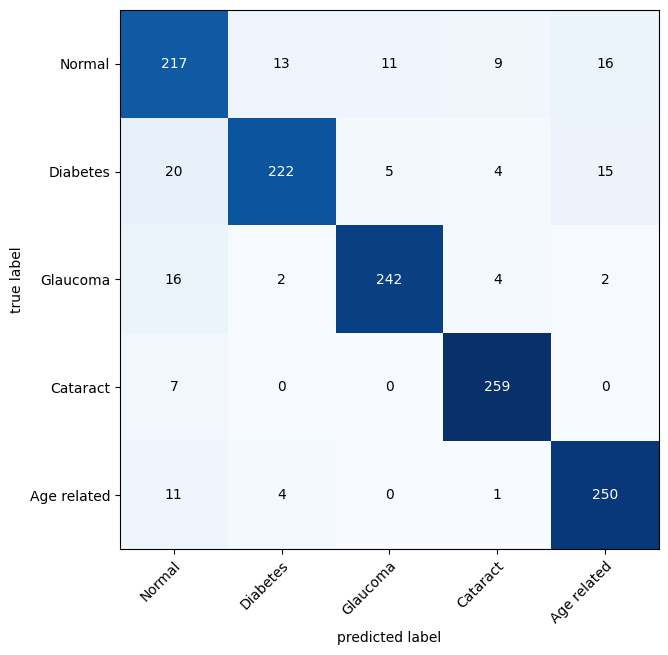

In [53]:
y_pred_tensor=torch.cat(y_preds)
print(y_pred_tensor.shape)
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat=ConfusionMatrix(num_classes=5,task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,target=torch.tensor(target))
# create and make into a tensor 
fig,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=list(dictionary_diseases.values())[:5],
    figsize=(10,7)
)

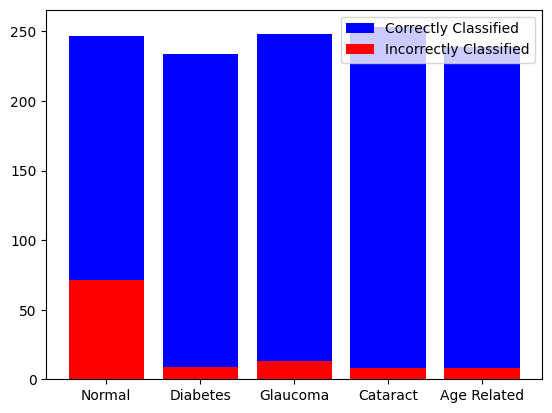

In [54]:
normal_c, normal_in = 247, (27+11+12+21)
diabetes_c, diabetes_in = 234, (3+1+0+5 )
glaucoma_c, glaucoma_in = 248, (8+3+1+1)
cataract_c, cataract_in = 253, (8)
age_related, age_related_in = 239, (8)

classes = ["Normal", "Diabetes", "Glaucoma", "Cataract", "Age Related"]
classified_c = [normal_c, diabetes_c, glaucoma_c, cataract_c, age_related]
classified_in = [normal_in, diabetes_in, glaucoma_in, cataract_in, age_related_in]

X_axis = np.arange(len(classes))

plt.bar(X_axis, classified_c, label="Correctly Classified", color="b")
plt.bar(X_axis, classified_in, label="Incorrectly Classified", color="r")

plt.xticks(X_axis, classes)
plt.legend()


In [55]:
def image_label_dataset(image):
    train_transforms = Compose([
        LoadImaged(keys="image"),
        EnsureChannelFirstd(keys="image"),
        Resized(keys="image", spatial_size=[300, 300]),
        RandFlipd(keys="image", prob=0.5, spatial_axis=1),  # Randomly flip along the y-axis
        ToTensord(keys=["image"])
    ])



    # Create a custom Dataset for training and testing
    train_dataset = Dataset(data=[{"image": image}],
                            transform=train_transforms)


    # Create data loaders for training and testing
    train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
    return train_loader

In [56]:
dictionary_diseases = {0: 'Normal',
 1: 'Diabetes',
 2: 'Glaucoma',
 3: 'Cataract',
 4: 'Age related'}
dictionary_diseases

{0: 'Normal', 1: 'Diabetes', 2: 'Glaucoma', 3: 'Cataract', 4: 'Age related'}

In [57]:
from timeit import default_timer as timer
import tempfile
from PIL import Image
model.to("cpu")
def predict(img):
    start_time = timer()



    # You should initialize and load your model here
    model.eval()
    
    with torch.inference_mode():
        # Create a temporary file to save the image
        with tempfile.NamedTemporaryFile(suffix=".jpg", delete=False) as tmp_image:
            img.save(tmp_image.name, format="JPEG")  # converts in jpeg
        
        # Load the image from the temporary file using the transform
        dataset = image_label_dataset(tmp_image.name)
        data = next(iter(dataset))
        image=data["image"]

        pred_probs = torch.softmax(model(image), dim=1)
        

        pred_labels_and_probs = {dictionary_diseases[i]: float(pred_probs[0][i]) for i in range(len(dictionary_diseases))}
    
    pred_time = round(timer() - start_time, 5)
    
    return pred_labels_and_probs, pred_time


In [58]:
import random
from PIL import Image
from pathlib import Path

test_dir = "C:/Users/Admin/IdeaProjects/project/preprocessed_images"

# Get a list of all test image filepaths
test_data_paths = list(ocular_dataset["image_paths"])
labels = list(ocular_dataset["target"])
print(test_data_paths)
print(labels)

# Randomly select a test image path
random_image_path = test_data_paths[0]
print(random_image_path)
image= Image.open(random_image_path)

# Open the target image
#image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[WindowsPath('preprocessed_images/3188_left.jpg'), WindowsPath('preprocessed_images/1115_right.jpg'), WindowsPath('preprocessed_images/3440_right.jpg'), WindowsPath('preprocessed_images/4298_left.jpg'), WindowsPath('preprocessed_images/3240_right.jpg'), WindowsPath('preprocessed_images/2348_right.jpg'), WindowsPath('preprocessed_images/2703_right.jpg'), WindowsPath('preprocessed_images/2604_left.jpg'), WindowsPath('preprocessed_images/2643_left.jpg'), WindowsPath('preprocessed_images/2390_left.jpg'), WindowsPath('preprocessed_images/2382_right.jpg'), WindowsPath('preprocessed_images/2854_right.jpg'), WindowsPath('preprocessed_images/3185_left.jpg'), WindowsPath('preprocessed_images/2579_right.jpg'), WindowsPath('preprocessed_images/4528_right.jpg'), WindowsPath('preprocessed_images/2716_left.jpg'), WindowsPath('preprocessed_images/2635_left.jpg'), WindowsPath('preprocessed_images/3356_right.jpg'), WindowsPath('preprocessed_images/2714_right.jpg'), WindowsPath('preprocessed_images/2625_

In [59]:
# Create a list of example inputs to our Gradio demo
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=10)]
example_list

[['preprocessed_images\\1443_left.jpg'],
 ['preprocessed_images\\1817_right.jpg'],
 ['preprocessed_images\\3426_left.jpg'],
 ['preprocessed_images\\2226_right.jpg'],
 ['preprocessed_images\\2242_left.jpg'],
 ['preprocessed_images\\1334_right.jpg'],
 ['preprocessed_images\\235_left.jpg'],
 ['preprocessed_images\\2592_right.jpg'],
 ['preprocessed_images\\992_left.jpg'],
 ['preprocessed_images\\1111_left.jpg']]

In [60]:
import gradio as gr


title = "Ocular Disease"
description = "Used to Predict Ocular diseases"


demo = gr.Interface(fn=predict, 
                    inputs=gr.Image(type="pil"), 
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), 
                             gr.Number(label="Prediction time (s)")], 
                    examples=example_list, 
                    title=title,
                    description=description
                    )


demo.launch(debug=False, 
            share=True) 

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
